<a href="https://colab.research.google.com/github/sssouto/caminho-da-escola/blob/main/TrabalhoFinal_SanderSoaresSouto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Trabalho Final - Ciência de Dados - Enap / 2021
### Aluno: Sander Soares Souto

### Apresentação do Dataset

O nome do dataset é "Aquisição de Ônibus Escolares do Programa Caminho da Escola - 2016/2020". Este dataset contém dados referentes à compra de veículos para o transporte escolar por parte dos Estados, do DF e dos Municípios entre os anos de 2016 e 2020, decorrentes dos pregões eletrônicos FNDE n.º 41, 42 e 43/2015; 18 e 19/2017 e 11/2019.

* Sobre o Programa Caminho da Escola:

O Caminho da Escola é um programa gerido pelo Fundo Nacional de Desenvolvimento da Educação - FNDE com o objetivo de "renovar, padronizar e ampliar a frota de veículos escolares das redes municipal, do DF e estadual de educação básica pública. Voltado a estudantes residentes, prioritariamente, em áreas rurais e ribeirinhas, o programa oferece ônibus, lanchas e bicicletas fabricados especialmente para o tráfego nestas regiões, sempre visando à segurança e à qualidade do transporte. [1](https://www.fnde.gov.br/programas/caminho-da-escola)". Esse programa é executado por meio do Registro de Preços Nacional - RPN.

* Sobre o Registro de Preços Nacional - RPN:

O RPN é uma estratégia de compra nacional compartilhada empreendida pelo FNDE em parceria com os entes federados. Nesse processo, o FNDE se encarrega da elaboração das especificações técnicas padronnizadas dos diferentes produtos, dos estudos de mercado, da realização do pregão eletrônico, do controle de qualidade e da gestão das atas de registro de preços firmadas com os fornecedores adjudicatários. Os Estados, o DF e Municípios, por sua vez, contratam os produtos e pagam diretamente aos respectivos fornecedores, valendo-se de recursos próprios e/ou de valores transferidos pelo FNDE para essa finalidade (transferências voluntárias). Parte desse processo é gerido por intermédio do Sistema de Gerenciamento de Atas de Registro de Preços - SIGARP [2](https://www.fnde.gov.br/sigarpweb/index/consultapublica), sob a responsabilidade do FNDE.

### Link para Download do Dataset:  

#### Base de dados do SIGARP: 
*   no Drive: https://drive.google.com/file/d/1z0sY7iWeU63ftDmXWvoHSaWMo0Jzz6_u/view?usp=sharing
*   no Github: https://github.com/sssouto/caminho-da-escola/blob/main/sigarp_fnde_pregoes_onibus_%2B2015.xlsx
*   Fonte: Sistema de Gerenciamento de Atas de Registro de Preços - SIGARP: https://www.fnde.gov.br/sigarpweb/index.php/relatorio/relatorio-pregao2/list

#### Base de dados do PIB: 
*   no Drive: https://drive.google.com/file/d/10tJW0Ks-_m153c7GtFxmX9E9-rPmnADU/view?usp=sharing
*   no Github: https://github.com/sssouto/caminho-da-escola/blob/main/PIB%20dos%20Munic%C3%ADpios%20-%20base%20de%20dados%202012-2018.xls
*   Fonte: Instituto Brasileiro de Geografia e Estatística - IBGE: https://www.ibge.gov.br/estatisticas/economicas/contas-nacionais/9088-produto-interno-bruto-dos-municipios.html?=&t=resultados&utm_source=landing&utm_medium=explica&utm_campaign=pib

### Motivação Pessoal:

Minha motivação pessoal para a escolha desse dataset reside no fato de que, desde o ano de 2012, tenho trabalhado na área de compras do FNDE, sendo que, entre 2015 e 2019, fui um dos coordenadores do RPN, período durante o qual fui o gestor do SIGARP. Assim, pela familiaridade com o assunto, achei oportuno explorar alguns dados das compras nacionais para a educação sob a gestão do FNDE. Dentre os diversos produtos do portfólio do RPN, escolhi os ônibus escolares do Programa Caminho da Escola porque esse foi o primeiro objeto executado pelo FNDE a partir dessa estratégia de compra compartilhada, assim como é o objeto com o maior volume de aquisições ao longo dos anos.

### Investigação

A investigação realizada neste estudo objetivou averiguar das seguintes hipóteses:

* Hipótese 1: existe uma maior tendência de aquisição de ônibus escolares com recursos transferidos pelo FNDE que com recursos próprios dos entes federados.

* Hipótese 2.1: os estados (UF) que mais adquirem ônibus escolares também são os que mais utilizam recursos próprios como forma de pagamento dos veículos.

* Hipótese 2.2: os estados (UF) que mais adquirem ônibus escolares com recursos próprios também são os que têm maior Produto Interno Bruto - PIB.

* Hipótese 3: as vendas de ônibus escolares para o Programa Caminho da Escola representam fatia consistente e significativa do mercado de ônibus no período investigado.

A investigação será realizada a partir dos dados de contratação de ônibus escolares pelos entes federados em decorrência da utilização das atas de registro de preços do FNDE, conforme dados do SIGARP.

In [ ]:
# Importando as bibliotecas:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
import heapq

In [ ]:
# Importando o dataset SIGARP:

# Fazendo upload de arquivos:
from google.colab import files
uploaded = files.upload()

## Dataset SIGARP: 
df_sigarp = pd.read_excel(io.BytesIO(uploaded['sigarp_fnde_pregoes_onibus_+2015.xlsx']))

Saving sigarp_fnde_pregoes_onibus_+2015.xlsx to sigarp_fnde_pregoes_onibus_+2015 (2).xlsx


In [ ]:
# Mostrando as primeiras linhas do dataset SIGARP:
df_sigarp.head()

,Nº da Solicitação de Adesão,Enquadramento,Código SIMEC,Número do Processo,Data Solicitação,Data última mov.,Nº do Pregão,Tipo do Pregão,Nº Ata Registro de Preço,Cnpj Entidade,Entidade,UF,Email,Telefone,Tipo de Pagamento,Nº do item no pregão,Item,Vigência do item,Qtde.,Fornecedor,Cnpj Fornecedor,Email Fornecedor,Telefone Fornecedor,Valor unitário,Valor total,Situação da adesão,ano_compra
0,71719,-,NaN,NaN,2016-12-16,2017-03-21,41/2015,Nacional,NaN,10.792.928/0016-96,CAMPUS EIRUNEPE,AM,gab.ceiru@ifam.edu.br,(97)-34811217,Recurso Próprio,1,Ônibus escolar com 01 (uma) área reservada (bo...,23/12/2015 - 23/12/2016,1,MARCOPOLO SA,88.611.835/0008-03,izaias@taguamotors.com.br,(54)-21014254,186400,186400,CONTRATO FIRMADO,2017
1,71614,-,NaN,NaN,2016-11-22,2016-12-16,41/2015,Nacional,NaN,13.393.152/0001-43,PREF MUN DE FATIMA,BA,prefeitura@fatima.ba.gov.br,(75)-36582336,Recurso Próprio,1,Ônibus escolar com 01 (uma) área reservada (bo...,23/12/2015 - 23/12/2016,5,MARCOPOLO SA,88.611.835/0008-03,izaias@taguamotors.com.br,(54)-21014254,186400,932000,CONTRATO FIRMADO,2016
2,71774,-,NaN,NaN,2016-12-21,2017-01-05,41/2015,Nacional,NaN,13.810.833/0001-60,PREF MUN DE RUY BARBOSA,BA,gabineteclaudio@gmail.com,(75)-32521043,Transferência Direta,1,Ônibus escolar com 01 (uma) área reservada (bo...,23/12/2015 - 23/12/2016,1,MARCOPOLO SA,88.611.835/0008-03,izaias@taguamotors.com.br,(54)-21014254,186400,186400,CONTRATO FIRMADO,2017
3,71608,-,NaN,NaN,2016-11-21,2017-02-24,41/2015,Nacional,NaN,13.811.807/0001-56,PREF MUN DE UTINGA,BA,administracao@utinga.ba.gov.br,(75)-33371020,Recurso Próprio,1,Ônibus escolar com 01 (uma) área reservada (bo...,23/12/2015 - 23/12/2016,10,MARCOPOLO SA,88.611.835/0008-03,izaias@taguamotors.com.br,(54)-21014254,186400,1864000,CONTRATO FIRMADO,2017
4,71296,-,NaN,NaN,2016-08-19,2016-10-06,41/2015,Nacional,NaN,07.616.162/0001-06,PREF MUN DE CAUCAIA,CE,prefeito@caucaia.ce.gov.br,(85)-33424410,Recurso Próprio,2,Ônibus escolar com 02 (duas) áreas reservadas ...,23/12/2015 - 23/12/2016,5,MARCOPOLO SA,88.611.835/0008-03,izaias@taguamotors.com.br,(54)-21014254,186400,932000,CONTRATO FIRMADO,2016


In [ ]:
# Preparando o dataset SIGARP:

# Criando a coluna "ano_compra" a partir da data contida na coluna "Data última mov.":
df_sigarp['ano_compra'] = pd.DatetimeIndex(df_sigarp['Data última mov.']).year

# Selecionando apenas os registros relativos aos anos de 2016 e 2020 (excluindo o ano de 2021):
df_sigarp = df_sigarp[df_sigarp['ano_compra'] < 2021]

# Mostrando as primeiras linhas do dataset SIGARP ajustado:
df_sigarp.head()

,Nº da Solicitação de Adesão,Enquadramento,Código SIMEC,Número do Processo,Data Solicitação,Data última mov.,Nº do Pregão,Tipo do Pregão,Nº Ata Registro de Preço,Cnpj Entidade,Entidade,UF,Email,Telefone,Tipo de Pagamento,Nº do item no pregão,Item,Vigência do item,Qtde.,Fornecedor,Cnpj Fornecedor,Email Fornecedor,Telefone Fornecedor,Valor unitário,Valor total,Situação da adesão,ano_compra
0,71719,-,NaN,NaN,2016-12-16,2017-03-21,41/2015,Nacional,NaN,10.792.928/0016-96,CAMPUS EIRUNEPE,AM,gab.ceiru@ifam.edu.br,(97)-34811217,Recurso Próprio,1,Ônibus escolar com 01 (uma) área reservada (bo...,23/12/2015 - 23/12/2016,1,MARCOPOLO SA,88.611.835/0008-03,izaias@taguamotors.com.br,(54)-21014254,186400,186400,CONTRATO FIRMADO,2017
1,71614,-,NaN,NaN,2016-11-22,2016-12-16,41/2015,Nacional,NaN,13.393.152/0001-43,PREF MUN DE FATIMA,BA,prefeitura@fatima.ba.gov.br,(75)-36582336,Recurso Próprio,1,Ônibus escolar com 01 (uma) área reservada (bo...,23/12/2015 - 23/12/2016,5,MARCOPOLO SA,88.611.835/0008-03,izaias@taguamotors.com.br,(54)-21014254,186400,932000,CONTRATO FIRMADO,2016
2,71774,-,NaN,NaN,2016-12-21,2017-01-05,41/2015,Nacional,NaN,13.810.833/0001-60,PREF MUN DE RUY BARBOSA,BA,gabineteclaudio@gmail.com,(75)-32521043,Transferência Direta,1,Ônibus escolar com 01 (uma) área reservada (bo...,23/12/2015 - 23/12/2016,1,MARCOPOLO SA,88.611.835/0008-03,izaias@taguamotors.com.br,(54)-21014254,186400,186400,CONTRATO FIRMADO,2017
3,71608,-,NaN,NaN,2016-11-21,2017-02-24,41/2015,Nacional,NaN,13.811.807/0001-56,PREF MUN DE UTINGA,BA,administracao@utinga.ba.gov.br,(75)-33371020,Recurso Próprio,1,Ônibus escolar com 01 (uma) área reservada (bo...,23/12/2015 - 23/12/2016,10,MARCOPOLO SA,88.611.835/0008-03,izaias@taguamotors.com.br,(54)-21014254,186400,1864000,CONTRATO FIRMADO,2017
4,71296,-,NaN,NaN,2016-08-19,2016-10-06,41/2015,Nacional,NaN,07.616.162/0001-06,PREF MUN DE CAUCAIA,CE,prefeito@caucaia.ce.gov.br,(85)-33424410,Recurso Próprio,2,Ônibus escolar com 02 (duas) áreas reservadas ...,23/12/2015 - 23/12/2016,5,MARCOPOLO SA,88.611.835/0008-03,izaias@taguamotors.com.br,(54)-21014254,186400,932000,CONTRATO FIRMADO,2016


### Hipótese 1: existe uma maior tendência de aquisição de ônibus escolares com recursos transferidos pelo FNDE que com recursos próprios dos entes federados.

In [ ]:
# Para realizar essa análise em uma mesma escala, foram consideradas compras com a mesma quantidade de ônibus.

## freq_qtde = df_sigarp['Qtde.'].value_counts()

# Como a maior parte das aquisições é de apenas 1 veículo (4.934 de 6.058 solicitações), filtrou-se o dataframe com essa quantidade:
df_sigarp_ano_valor = df_sigarp[df_sigarp['Qtde.'] == 1]


Text(0.35, 0.001, '* Foram consideradas neste levantamento somente as compras em que foi adquirido apenas 1 veículo')

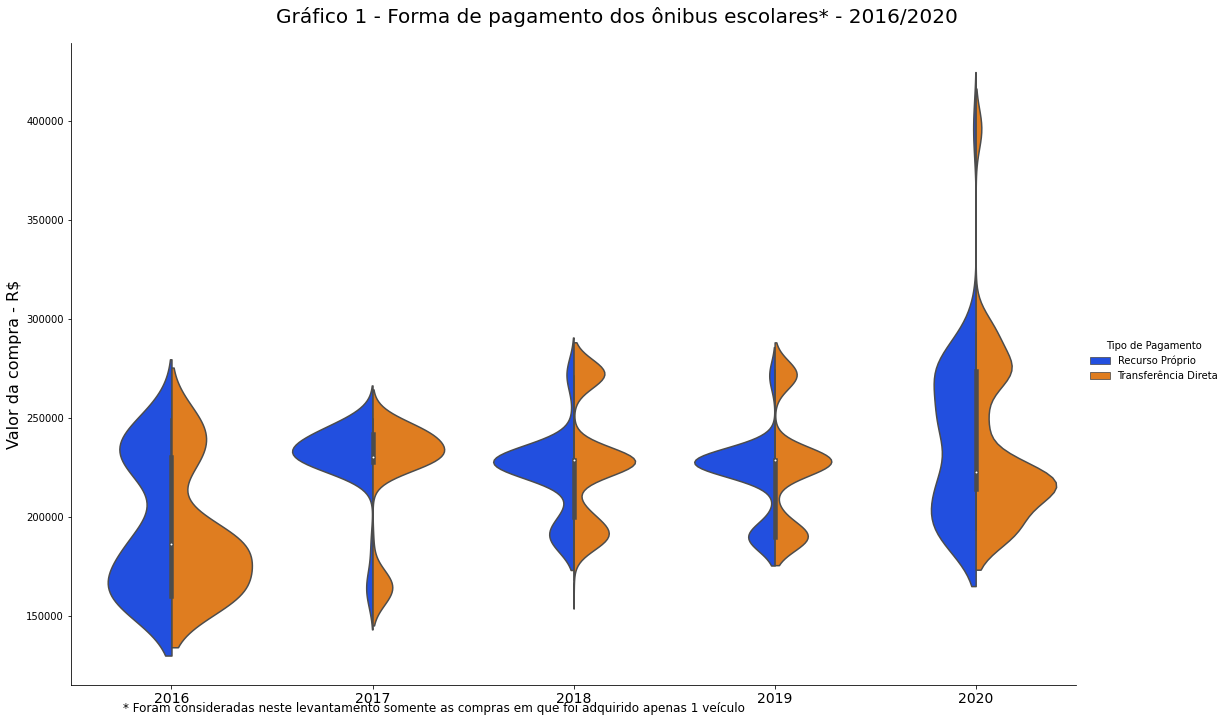

In [ ]:
# Plotando um gráfico do tipo 'violino', com o intuito de facilitar a visualização da distribuição dos valores gastos por forma de pagamento, 
# valendo-se da função densidade de probabilidade estimada. No eixo 'x', foram plotados os anos de análise:
g = sns.catplot(x="ano_compra", y="Valor total", hue="Tipo de Pagamento", kind="violin", split=True, data=df_sigarp_ano_valor, palette='bright', height=10, aspect=1.5)
g.set_axis_labels("", "Valor da compra - R$", fontsize=16)
g.set_xticklabels(fontsize=14)
g.fig.subplots_adjust(top=0.93)
g.fig.suptitle("Gráfico 1 - Forma de pagamento dos ônibus escolares* - 2016/2020", fontsize=20)
plt.figtext(0.35, 0.001, "* Foram consideradas neste levantamento somente as compras em que foi adquirido apenas 1 veículo", ha="center", fontsize=12)

In [ ]:
# Importando o dataset PIB:

# Fazendo upload de arquivos:
from google.colab import files
uploaded = files.upload()

## Dataset PIB:
df_pib = pd.read_excel(io.BytesIO(uploaded['PIB dos Municípios - base de dados 2012-2018.xls']))

Saving PIB dos Municípios - base de dados 2012-2018.xls to PIB dos Municípios - base de dados 2012-2018 (2).xls


In [ ]:
# Mostrando as primeiras linhas do dataset PIB:
df_pib.head()

,Ano,Código da Grande Região,Nome da Grande Região,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,Código do Município,Nome do Município,Região Metropolitana,Código da Mesorregião,Nome da Mesorregião,Código da Microrregião,Nome da Microrregião,Código da Região Geográfica Imediata,Nome da Região Geográfica Imediata,Município da Região Geográfica Imediata,Código da Região Geográfica Intermediária,Nome da Região Geográfica Intermediária,Município da Região Geográfica Intermediária,Código Concentração Urbana,Nome Concentração Urbana,Tipo Concentração Urbana,Código Arranjo Populacional,Nome Arranjo Populacional,Hierarquia Urbana,Hierarquia Urbana (principais categorias),Código da Região Rural,Nome da Região Rural,Região rural (segundo classificação do núcleo),Amazônia Legal,Semiárido,Cidade-Região de São Paulo,"Valor adicionado bruto da Agropecuária, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto da Indústria,\na preços correntes\n(R$ 1.000)","Valor adicionado bruto dos Serviços,\na preços correntes \n- exceto Administração, defesa, educação e saúde públicas e seguridade social\n(R$ 1.000)","Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)","Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)",Atividade com maior valor adicionado bruto,Atividade com segundo maior valor adicionado bruto,Atividade com terceiro maior valor adicionado bruto
0,2012,1,Norte,11,RO,Rondônia,1100015,Alta Floresta D'Oeste,NaN,1102,Leste Rondoniense,11006,Cacoal,110005,Cacoal,do Entorno,1102,Ji-Paraná,do Entorno,NaN,NaN,NaN,NaN,NaN,Centro Local,Centro Local,1101,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,106124.681,18905.656,71329.833,112789.354,309149.524,19879.955,329029.479,13670.26,"Administração, defesa, educação e saúde públic...","Pecuária, inclusive apoio à pecuária",Demais serviços
1,2012,1,Norte,11,RO,Rondônia,1100023,Ariquemes,NaN,1102,Leste Rondoniense,11003,Ariquemes,110002,Ariquemes,Polo,1101,Porto Velho,do Entorno,NaN,NaN,NaN,NaN,NaN,Centro Subregional B,Centro Subregional,1101,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,96495.299,308634.238,680674.995,415410.772,1501215.305,202426.632,1703641.937,18368.70,Demais serviços,"Administração, defesa, educação e saúde públic...",Comércio e reparação de veículos automotores e...
2,2012,1,Norte,11,RO,Rondônia,1100031,Cabixi,NaN,1102,Leste Rondoniense,11008,Colorado do Oeste,110006,Vilhena,do Entorno,1102,Ji-Paraná,do Entorno,NaN,NaN,NaN,NaN,NaN,Centro Local,Centro Local,1101,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,43378.031,4170.729,17049.108,30398.152,94996.021,4590.460,99586.481,16240.46,"Administração, defesa, educação e saúde públic...","Agricultura, inclusive apoio à agricultura e a...","Pecuária, inclusive apoio à pecuária"
3,2012,1,Norte,11,RO,Rondônia,1100049,Cacoal,NaN,1102,Leste Rondoniense,11006,Cacoal,110005,Cacoal,Polo,1102,Ji-Paraná,do Entorno,NaN,NaN,NaN,NaN,NaN,Centro Subregional B,Centro Subregional,5105,Região Rural do Centro Sub-regional de Vilhena...,Região Rural de Centro Sub-regional,Sim,Não,Não,135438.597,148693.529,574071.027,353322.876,1211526.028,161179.057,1372705.085,17303.73,Demais serviços,"Administração, defesa, educação e saúde públic...",Comércio e reparação de veículos automotores e...
4,2012,1,Norte,11,RO,Rondônia,1100056,Cerejeiras,NaN,1102,Leste Rondoniense,11008,Colorado do Oeste,110006,Vilhena,do Entorno,1102,Ji-Paraná,do Entorno,NaN,NaN,NaN,NaN,NaN,Centro de Zona B,Centro de Zona,1101,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Si

### Conclusões e Achados